In [1]:
# tables
import pandas as pd
import numpy as np
# graphics
import seaborn as sns
import matplotlib.pyplot as plt
#nltk
import nltk

import re
from bs4 import BeautifulSoup

import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\thiba\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


# Score > 80

In [2]:
df=pd.read_csv("QueryResults_1.csv", sep=',',encoding = 'UTF-8')
df=df.append(pd.read_csv("QueryResults_2.csv", sep=',',encoding = 'UTF-8'),ignore_index = True)

In [3]:
df

,Id,Body,Title,Tags
0,4,<p>I want to use a <code>Track-Bar</code> to c...,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...
1,6,<p>I have an absolutely positioned <code>div</...,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>
2,9,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age based on a Da...,<c#><.net><datetime>
3,11,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
4,13,<p>Is there a standard way for a web server to...,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...
...,...,...,...,...
58898,60573595,<p>Every time I try <code>npm install</code>. ...,`npm install` fails on node-gyp rebuild with `...,<node.js><npm><terminal><macos-catalina><node-...
58899,60625906,"<p>I am reading a book (<a href=""https://smile...",Why cast free's return value to void?,<c><casting><free><void><legacy-code>
58900,62950667,<p>We're currently migrating from Java 8 to Ja...,Is there any need to switch to modules when mi...,<java><java-11><java-platform-module-system>
58901,62969917,"<p>All of a sudden, I am getting this build er...","How to fix ""unexpected element <queries> found...",<android><android-gradle-plugin><android-manif...


In [4]:
print("Body")
print(df.Body.shape)
print(df.Body.drop_duplicates().shape)
print("Title")
print(df.Title.shape)
print(df.Title.drop_duplicates().shape)
print("Tags")
print(df.Tags.shape)
print(df.Tags.drop_duplicates().shape)

Body
(58903,)
(58903,)
Title
(58903,)
(58898,)
Tags
(58903,)
(41457,)


In [5]:
df.shape

(58903, 4)

In [6]:
df=df.drop(['Id'],axis=1).drop_duplicates()

In [7]:
df.shape

(58903, 3)

# Prétraitement

### Fonctions

In [8]:
#fontion de 'tokenization' pour df.Title et df.Body
def token(text):
    text=re.sub('[^a-zA-Z0-9#+]', ' ',BeautifulSoup(text, "lxml").get_text() ).lower().split()
    return text

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [10]:
#fontion pour le 'stemming' et le suppression des stopwords pour df.Title et df.Body
import nltk
sno = nltk.stem.SnowballStemmer('english')
def stemmer(s):
    s = [sno.stem(word) for word in s if word not in (stop)]
    return s

## Body

In [11]:
df.Body.iloc[0]

'<p>I want to use a <code>Track-Bar</code> to change a <code>Form</code>\'s opacity.</p>\n<p>This is my code:</p>\n<pre class="lang-cs prettyprint-override"><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n<p>When I build the application, it gives the following error:</p>\n<blockquote>\n<pre class="lang-none prettyprint-override"><code>Cannot implicitly convert type decimal to double\n</code></pre>\n</blockquote>\n<p>I have tried using <code>trans</code> and <code>double</code>, but then the <code>Control</code> doesn\'t work. This code worked fine in a past VB.NET project.</p>\n'

In [12]:
df.Body=df.Body.map(token)

In [13]:
df.Body

0        [i, want, to, use, a, track, bar, to, change, ...
1        [i, have, an, absolutely, positioned, div, con...
2        [given, a, datetime, representing, a, person, ...
3        [given, a, specific, datetime, value, how, do,...
4        [is, there, a, standard, way, for, a, web, ser...
                               ...                        
58898    [every, time, i, try, npm, install, i, get, th...
58899    [i, am, reading, a, book, programming, with, p...
58900    [we, re, currently, migrating, from, java, 8, ...
58901    [all, of, a, sudden, i, am, getting, this, bui...
58902    [i, have, a, fairly, complex, maths, library, ...
Name: Body, Length: 58903, dtype: object

In [14]:
df.Body=df.Body.apply(stemmer)

In [15]:
df.Body

0        [want, use, track, bar, chang, form, opac, cod...
1        [absolut, posit, div, contain, sever, children...
2        [given, datetim, repres, person, birthday, cal...
3        [given, specif, datetim, valu, display, relat,...
4        [standard, way, web, server, abl, determin, us...
                               ...                        
58898    [everi, time, tri, npm, instal, get, follow, e...
58899    [read, book, program, posix, thread, butenhof,...
58900    [current, migrat, java, 8, java, 11, howev, up...
58901    [sudden, get, build, error, android, project, ...
58902    [fair, complex, math, librari, work, discov, n...
Name: Body, Length: 58903, dtype: object

## Title

In [16]:
df=df.drop_duplicates(subset=['Title'])

In [17]:
df

,Body,Title,Tags
0,"[want, use, track, bar, chang, form, opac, cod...",How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...
1,"[absolut, posit, div, contain, sever, children...",Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>
2,"[given, datetim, repres, person, birthday, cal...",How do I calculate someone's age based on a Da...,<c#><.net><datetime>
3,"[given, specif, datetim, valu, display, relat,...",Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
4,"[standard, way, web, server, abl, determin, us...",Determine a user's timezone,<html><browser><timezone><user-agent><timezone...
...,...,...,...
58898,"[everi, time, tri, npm, instal, get, follow, e...",`npm install` fails on node-gyp rebuild with `...,<node.js><npm><terminal><macos-catalina><node-...
58899,"[read, book, program, posix, thread, butenhof,...",Why cast free's return value to void?,<c><casting><free><void><legacy-code>
58900,"[current, migrat, java, 8, java, 11, howev, up...",Is there any need to switch to modules when mi...,<java><java-11><java-platform-module-system>
58901,"[sudden, get, build, error, android, project, ...","How to fix ""unexpected element <queries> found...",<android><android-gradle-plugin><android-manif...


In [18]:
df.Title.iloc[0]

'How to convert a Decimal to a Double in C#?'

In [19]:
df.Title

0              How to convert a Decimal to a Double in C#?
1        Why did the width collapse in the percentage w...
2        How do I calculate someone's age based on a Da...
3                            Calculate relative time in C#
4                              Determine a user's timezone
                               ...                        
58898    `npm install` fails on node-gyp rebuild with `...
58899                Why cast free's return value to void?
58900    Is there any need to switch to modules when mi...
58901    How to fix "unexpected element <queries> found...
58902    How can I make my class immune to the "auto va...
Name: Title, Length: 58898, dtype: object

In [20]:
df.Title=df.Title.map(token)

In [21]:
df.Title

0        [how, to, convert, a, decimal, to, a, double, ...
1        [why, did, the, width, collapse, in, the, perc...
2        [how, do, i, calculate, someone, s, age, based...
3                      [calculate, relative, time, in, c#]
4                        [determine, a, user, s, timezone]
                               ...                        
58898    [npm, install, fails, on, node, gyp, rebuild, ...
58899        [why, cast, free, s, return, value, to, void]
58900    [is, there, any, need, to, switch, to, modules...
58901    [how, to, fix, unexpected, element, found, in,...
58902    [how, can, i, make, my, class, immune, to, the...
Name: Title, Length: 58898, dtype: object

In [22]:
df.Title=df.Title.apply(stemmer)

In [23]:
df.Title

0                              [convert, decim, doubl, c#]
1        [width, collaps, percentag, width, child, elem...
2        [calcul, someon, age, base, datetim, type, bir...
3                                [calcul, relat, time, c#]
4                                [determin, user, timezon]
                               ...                        
58898    [npm, instal, fail, node, gyp, rebuild, gyp, x...
58899                     [cast, free, return, valu, void]
58900    [need, switch, modul, migrat, java, 9+, java, 11]
58901               [fix, unexpect, element, found, error]
58902    [make, class, immun, auto, valu, copi, proxi, ...
Name: Title, Length: 58898, dtype: object

## Tags

In [24]:
df.Tags.iloc[0]

'<c#><floating-point><type-conversion><double><decimal>'

In [25]:
df.Tags=df["Tags"].map(lambda field:field[1:-1].split('><'))

In [26]:
df.Tags

0        [c#, floating-point, type-conversion, double, ...
1                         [html, css, internet-explorer-7]
2                                     [c#, .net, datetime]
3        [c#, datetime, time, datediff, relative-time-s...
4        [html, browser, timezone, user-agent, timezone...
                               ...                        
58898    [node.js, npm, terminal, macos-catalina, node-...
58899                [c, casting, free, void, legacy-code]
58900         [java, java-11, java-platform-module-system]
58901    [android, android-gradle-plugin, android-manif...
58902                               [c++, copy-assignment]
Name: Tags, Length: 58898, dtype: object

In [27]:
df

,Body,Title,Tags
0,"[want, use, track, bar, chang, form, opac, cod...","[convert, decim, doubl, c#]","[c#, floating-point, type-conversion, double, ..."
1,"[absolut, posit, div, contain, sever, children...","[width, collaps, percentag, width, child, elem...","[html, css, internet-explorer-7]"
2,"[given, datetim, repres, person, birthday, cal...","[calcul, someon, age, base, datetim, type, bir...","[c#, .net, datetime]"
3,"[given, specif, datetim, valu, display, relat,...","[calcul, relat, time, c#]","[c#, datetime, time, datediff, relative-time-s..."
4,"[standard, way, web, server, abl, determin, us...","[determin, user, timezon]","[html, browser, timezone, user-agent, timezone..."
...,...,...,...
58898,"[everi, time, tri, npm, instal, get, follow, e...","[npm, instal, fail, node, gyp, rebuild, gyp, x...","[node.js, npm, terminal, macos-catalina, node-..."
58899,"[read, book, program, posix, thread, butenhof,...","[cast, free, return, valu, void]","[c, casting, free, void, legacy-code]"
58900,"[current, migrat, java, 8, java, 11, howev, up...","[need, switch, modul, migrat, java, 9+, java, 11]","[java, java-11, java-platform-module-system]"
58901,"[sudden, get, build, error, android, project, ...","[fix, unexpect, element, found, error]","[android, android-gradle-plugin, android-manif..."


# Analyse et gestion des tags

C:\Users\thiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


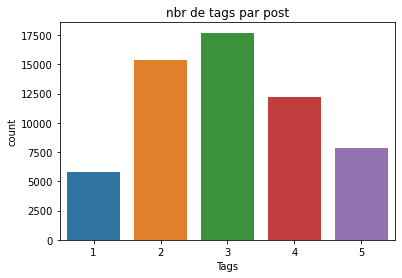

In [28]:
sns.countplot(df.Tags.map(lambda field:len(field)))
plt.title("nbr de tags par post")
plt.show()

In [29]:
all_tags=[]
for i in df.Tags:
    for j in i:
        all_tags.append(j)

C:\Users\thiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


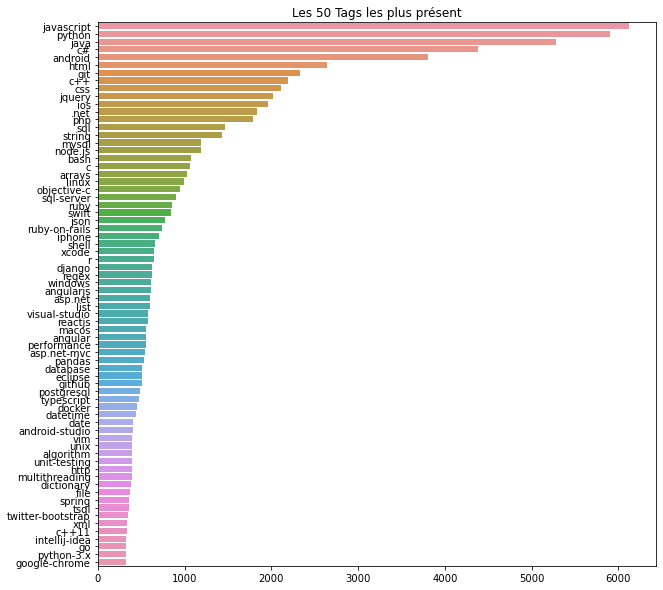

In [30]:
#Affichage des 20 Tags les plus présent
import collections
counter=collections.Counter(all_tags)
common = counter.most_common(70)
labels = [item[0] for item in common]
number = [item[1] for item in common]

plt.figure(figsize=(10,10))
sns.barplot(number, labels)
plt.title("Les 50 Tags les plus présent")
plt.show()

In [31]:
liste=[]
for i in range(0,len(labels)):
    if number[i]>500:
        liste.append(labels[i])    

In [32]:
len(liste)

47

In [33]:
def tags_to_keep(list):
    list = [x for x in list if x in labels[:50]]
    return list

In [34]:
df.Tags=df.Tags.apply(tags_to_keep)

In [35]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [36]:
index_to_drop=[]
for i in range(0,len(df)-1):
    if len(df.Tags[i])==0:
        index_to_drop.append(i)

In [37]:
df.Tags=df.Tags.drop(index=index_to_drop,axis=0)

In [38]:
df=df.dropna()

C:\Users\thiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


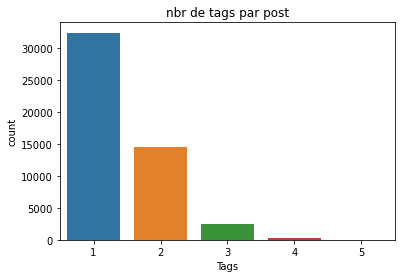

In [39]:
sns.countplot(df.Tags.map(lambda field:len(field)))
plt.title("nbr de tags par post")
plt.show()

In [40]:
df

,Body,Title,Tags
0,"[want, use, track, bar, chang, form, opac, cod...","[convert, decim, doubl, c#]",[c#]
1,"[absolut, posit, div, contain, sever, children...","[width, collaps, percentag, width, child, elem...","[html, css]"
2,"[given, datetim, repres, person, birthday, cal...","[calcul, someon, age, base, datetim, type, bir...","[c#, .net]"
3,"[given, specif, datetim, valu, display, relat,...","[calcul, relat, time, c#]",[c#]
4,"[standard, way, web, server, abl, determin, us...","[determin, user, timezon]",[html]
...,...,...,...
58893,"[everi, time, tri, npm, instal, get, follow, e...","[npm, instal, fail, node, gyp, rebuild, gyp, x...",[node.js]
58894,"[read, book, program, posix, thread, butenhof,...","[cast, free, return, valu, void]",[c]
58895,"[current, migrat, java, 8, java, 11, howev, up...","[need, switch, modul, migrat, java, 9+, java, 11]",[java]
58896,"[sudden, get, build, error, android, project, ...","[fix, unexpect, element, found, error]",[android]


# Mettre en œuvre une approche non supervisée.

In [41]:
df["Document"] = (df.Title + df.Body)

In [42]:
df=df.drop(["Title", "Body"], axis=1)

In [43]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
58893,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
58894,[c],"[cast, free, return, valu, void, read, book, p..."
58895,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
58896,[android],"[fix, unexpect, element, found, error, sudden,..."


# LDA

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)
tfidf = tfidf_vectorizer.fit_transform(df.Document)

In [46]:
from sklearn.decomposition import LatentDirichletAllocation

In [47]:
lda =  LatentDirichletAllocation(n_components = 4)

In [48]:
lda.fit(tfidf)

LatentDirichletAllocation(n_components=4)

In [49]:
lda.perplexity(tfidf)

3167.7348939862677

In [50]:
lda.score(tfidf)

-1853591.0870562263

In [51]:
pyLDAvis.sklearn.prepare(lda,tfidf,tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.114119 -0.128318       1        1  31.715602
0      0.083363  0.098248       2        1  29.208305
3     -0.027943  0.081581       3        1  22.855185
2     -0.169538 -0.051510       4        1  16.220909, topic_info=        Term        Freq        Total Category  logprob  loglift
1818     git  646.000000   646.000000  Default  30.0000  30.0000
4183    tabl  484.000000   484.000000  Default  29.0000  29.0000
4049  string  994.000000   994.000000  Default  28.0000  28.0000
875   column  371.000000   371.000000  Default  27.0000  27.0000
3959     sql  325.000000   325.000000  Default  26.0000  26.0000
...      ...         ...          ...      ...      ...      ...
3787  server  127.343942   381.741182   Topic4  -5.6799   0.7210
4756    want  140.222145   722.286447   Topic4  -5.5835   0.1797
4541     use  146.186105  1376.314825   Topic4  -5.5419  -0.4234
1027   creat  127.541206   520.432844   Topic4  -5.6783   0.4126
2431    like  128.735659   816.267280   Topic4  -5.6690  -0.0281

[315 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.051588     00
0         2  0.017196     00
0         3  0.042990     00
0         4  0.885589     00
1         3  0.021341  00 00
...     ...       ...    ...
4955      1  0.005961  xcode
4955      2  0.917978  xcode
4955      3  0.065570  xcode
4955      4  0.005961  xcode
4986      3  0.965039   yyyi

[634 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [52]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

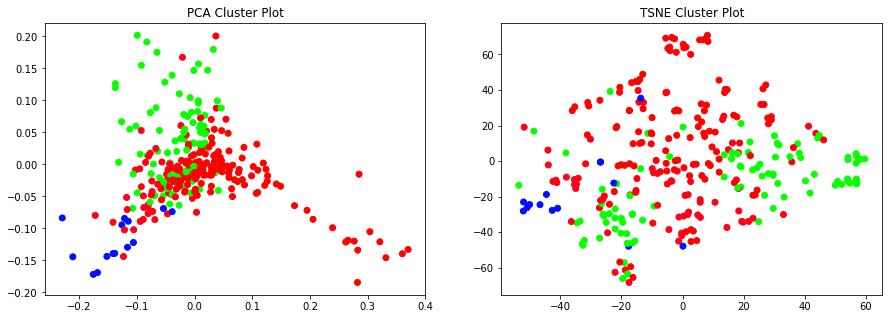

In [53]:
clusters = MiniBatchKMeans(n_clusters=4, random_state=20).fit_predict(tfidf)
plot_tsne_pca(tfidf, clusters)

In [54]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

number_topics = 4
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(tfidf)

print("Topics found via LDA:")
print_topics(lda, tfidf_vectorizer, number_words)

Topics found via LDA:

Topic #0:
class object use method public android java string function return

Topic #1:
div html jqueri text imag button use page css element

Topic #2:
file git run use instal project error command app version

Topic #3:
string tabl list column valu array python sql use number


In [55]:
# utiliser scipy pour transformer la matrice
# savoir quelle ligne se retrouve dans quel topic 

### SKLearn

In [56]:
dict={}
for i in [2,4,6,10,12]:
    #,4,6,10,12
    lda =  LatentDirichletAllocation(n_components = i).fit(tfidf)
    perp=lda.perplexity(tfidf)
    dict[i]=perp

In [57]:
dict

{2: 2763.073702335943,
 4: 3141.1228540748198,
 6: 3487.081868750519,
 10: 4061.79119649677,
 12: 4515.842917905724}

### Ou avec Gensim

In [58]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import gensim

In [59]:
id2word = corpora.Dictionary(df.Document)

texts = df.Document

corpus = [id2word.doc2bow(text) for text in texts]

In [60]:
dict={}
for i in  np.arange(2,20,1) :
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df.Document, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    dict[i]=coherence_lda
    print('Coherence Score: ', coherence_lda)

Coherence Score:  0.46529843677214844


KeyboardInterrupt: 

In [ ]:
plt.plot(*zip(*sorted(dict.items())))
plt.show()

In [ ]:
keys = dict.keys()
values = dict.values()

plt.figure(figsize=(10,10))
plt.bar(keys, values)
plt.show()

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [ ]:
vis

# Utiliser une approche supervisée

In [61]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn.model_selection import train_test_split

In [82]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [83]:
X = df["Document"].apply(lambda x: ' '.join(x))
y = df["Tags"]

In [84]:
all_tags=[]
for i in df.Tags:
    for j in i:
        all_tags.append(j)

In [85]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

In [86]:
multilabel_binarizer = MultiLabelBinarizer()
y = multilabel_binarizer.fit_transform(y)

In [87]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=.8,
    min_df=5,
    max_features=20000,
    ngram_range=(1, 1)
)
X= tfidf_vectorizer.fit_transform(X)

In [88]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
49761,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
49762,[c],"[cast, free, return, valu, void, read, book, p..."
49763,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
49764,[android],"[fix, unexpect, element, found, error, sudden,..."


In [89]:
multilabel_binarizer.classes_

array(['.net', 'android', 'angular', 'angularjs', 'arrays', 'asp.net',
       'asp.net-mvc', 'bash', 'c', 'c#', 'c++', 'css', 'database',
       'django', 'docker', 'eclipse', 'git', 'github', 'html', 'ios',
       'iphone', 'java', 'javascript', 'jquery', 'json', 'linux', 'list',
       'macos', 'mysql', 'node.js', 'objective-c', 'pandas',
       'performance', 'php', 'postgresql', 'python', 'r', 'reactjs',
       'regex', 'ruby', 'ruby-on-rails', 'shell', 'sql', 'sql-server',
       'string', 'swift', 'typescript', 'visual-studio', 'windows',
       'xcode'], dtype=object)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
from sklearn.metrics import hamming_loss,accuracy_score, classification_report,jaccard_score,f1_score
#Sklearn.metrics.jaccard_score

In [92]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
svc = LinearSVC(random_state=0)
forest = RandomForestClassifier(random_state=0)
perceptron = Perceptron(random_state=0)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(random_state=0)
gbc=GradientBoostingClassifier(random_state=0)
#Ajouter Gradient boosting

In [94]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
49761,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
49762,[c],"[cast, free, return, valu, void, read, book, p..."
49763,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
49764,[android],"[fix, unexpect, element, found, error, sudden,..."


In [95]:
y_train[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [96]:
classifier=[svc,forest,perceptron,lr,sgd,gbc]

In [97]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
49761,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
49762,[c],"[cast, free, return, valu, void, read, book, p..."
49763,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
49764,[android],"[fix, unexpect, element, found, error, sudden,..."


In [98]:
results = pd.DataFrame({})
def errors(name,model,X_train, y_train,X_test,y_test):
    global results
    clf = MultiOutputClassifier(model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = results.append(pd.DataFrame({
        'Modèle': [name],
        'Hamming_loss':hamming_loss(y_pred, y_test),
        'Jaccard_score':jaccard_score(y_pred, y_test,average='macro')*100,
        'Accuracy_score':accuracy_score(y_pred, y_test),
        'Macro_f1_score':f1_score(y_test, y_pred,average='macro'),
        'Micro_f1_score':f1_score(y_test, y_pred,average='micro')}),ignore_index=True)

In [99]:
for i in classifier:
    errors(str(i),i,X_train, y_train,X_test,y_test)

In [100]:
results

,Modèle,Hamming_loss,Jaccard_score,Accuracy_score,Macro_f1_score,Micro_f1_score
0,LinearSVC(random_state=0),0.013044,54.489512,0.520896,0.680502,0.736974
1,RandomForestClassifier(random_state=0),0.016042,34.162042,0.422745,0.452731,0.621324
2,Perceptron(),0.017880,50.188791,0.431384,0.643205,0.680088
3,LogisticRegression(random_state=0),0.015527,42.206302,0.429275,0.567194,0.653048
4,SGDClassifier(random_state=0),0.014688,45.168445,0.455998,0.578660,0.672667
5,GradientBoostingClassifier(random_state=0),0.015095,50.956384,0.454792,0.645370,0.695102


In [101]:
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [102]:
t0 = time()
pipeline = Pipeline([('clf', MultiOutputClassifier(LinearSVC()))])
parameters = {
     "clf__estimator__C": np.arange(1,20,2),     
     "clf__estimator__max_iter":[1000, 10000, 20000]
}

model_tunning = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
model_tunning.fit(X_train, y_train)

print ("Accuracy Score: ", accuracy_score(y_test, model_tunning.best_estimator_.predict(X_test)))
print("done in %0.3fs." % (time() - t0))
model_tunning.best_estimator_

C:\Users\thiba\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\thiba\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy Score:  0.5208961221619449
done in 608.652s.


Pipeline(steps=[('clf',
                 MultiOutputClassifier(estimator=LinearSVC(C=1,
                                                           max_iter=20000)))])

In [103]:
model_tunning.best_params_

{'clf__estimator__C': 1, 'clf__estimator__max_iter': 20000}

In [104]:
jaccard_score( model_tunning.best_estimator_.predict(X_test),y_test,average='macro')*100

54.48951211762784

In [105]:
def errors_grid(name,X_train, y_train,X_test,y_test):
    global results
    model=LinearSVC(C=1, max_iter=20000)
    clf = MultiOutputClassifier(model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = results.append(pd.DataFrame({
        'Modèle': [name],
        'Hamming_loss':hamming_loss(y_pred, y_test),
        'Jaccard_score':jaccard_score(y_pred, y_test,average='macro')*100,
        'Accuracy_score':accuracy_score(y_pred, y_test),
        'Macro_f1_score':f1_score(y_test, y_pred,average='macro'),
        'Micro_f1_score':f1_score(y_test, y_pred,average='micro')}),ignore_index=True)

In [106]:
errors_grid('LinearSVC(C=1, max_iter=20000)',X_train, y_train,X_test,y_test)

In [107]:
results

,Modèle,Hamming_loss,Jaccard_score,Accuracy_score,Macro_f1_score,Micro_f1_score
0,LinearSVC(random_state=0),0.013044,54.489512,0.520896,0.680502,0.736974
1,RandomForestClassifier(random_state=0),0.016042,34.162042,0.422745,0.452731,0.621324
2,Perceptron(),0.017880,50.188791,0.431384,0.643205,0.680088
3,LogisticRegression(random_state=0),0.015527,42.206302,0.429275,0.567194,0.653048
4,SGDClassifier(random_state=0),0.014688,45.168445,0.455998,0.578660,0.672667
5,GradientBoostingClassifier(random_state=0),0.015095,50.956384,0.454792,0.645370,0.695102
6,"LinearSVC(C=1, max_iter=20000)",0.013044,54.489512,0.520896,0.680502,0.736974
